##### 使用线性拟合预测
###### 尝试使用线性回归

In [1]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt

In [2]:
# 读取信息
data_path = r'D:\project\DLTB\chapter3_bike_predictor\bike_data\hour.csv'
bike_data = pd.read_csv(data_path, index_col=None).fillna(0)
print('cloumns name is %s' % str(bike_data.columns))

# 构造标签
y = torch.tensor(bike_data['cnt'][:50].values, dtype=torch.float64, requires_grad=True)
x = torch.tensor(np.arange(y.shape[0]), dtype=torch.float64, requires_grad=True)

# 构造参数
a = torch.rand(1, dtype=torch.float64, requires_grad=True)
b = torch.rand(1, dtype=torch.float64, requires_grad=True)

cloumns name is Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [3]:
# 设定学习率
learning_rate = 1e-5

# 反向传播更新参数
for i in range(10000):
    y_pre = x * a + b
    loss = torch.mean((y_pre - y)**2)
    loss.backward()
    a.data.add_(-a.grad.data * learning_rate)
    b.data.add_(-b.grad.data * learning_rate)
    # 累计梯度清零
    a.grad.data.zero_()
    b.grad.data.zero_()
    # 输出训练损失
    if i % 1000 == 0:
        print('loss: %.2f' % loss.data.float())

loss: 1482.02
loss: 1359.61
loss: 1356.04
loss: 1352.50
loss: 1348.99
loss: 1345.53
loss: 1342.10
loss: 1338.70
loss: 1335.34
loss: 1332.01


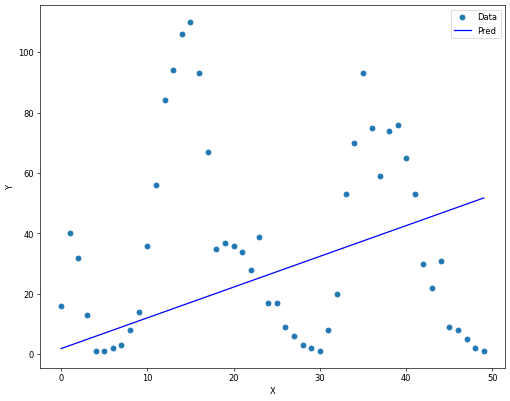

In [4]:
# 绘制效果图
plt.figure(figsize=(10, 8), dpi=60)
figure_1, = plt.plot(x.data.numpy(), y.data.numpy(), 'o')
figure_2, = plt.plot(x.data.numpy(), y_pre.data.numpy(), 'b')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([figure_1, figure_2], ['Data', 'Pred'])

##### 使用简单神经网络
###### 构建一个单一输入，10个隐含层单元，1个输出单元的人工神经网络预测器

In [4]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt

In [19]:
# 读取信息
data_path = r'D:\project\DLTB\chapter3_bike_predictor\bike_data\hour.csv'
rides = pd.read_csv(data_path, index_col=None).fillna(0)
sz = 10

#取出最后一列的前50条记录来进行预测
counts = rides['cnt'][:50]

#创建归一化的变量x，它的取值是0.02,0.04,...,1
x = torch.tensor(np.arange(len(counts), dtype = float) / len(counts), requires_grad = True)

# 创建归一化的预测变量y，它的取值范围是0～1
y = torch.tensor(np.array(counts, dtype = float), requires_grad = True)

# 初始化所有神经网络的权重（weights）和阈值（biases）
weights = torch.randn((1, sz), dtype = torch.double, requires_grad = True) #1*10的输入到隐含层的权重矩阵
biases = torch.randn(sz, dtype = torch.double, requires_grad = True) #尺度为10的隐含层节点偏置向量
weights2 = torch.randn((sz, 1), dtype = torch.double, requires_grad = True) #10*1的隐含到输出层权重矩阵

learning_rate = 1e-3 #设置学习率
epocha = int(1e5)
losses = []

# 将 x 转换为(50,1)的维度，以便与维度为(1,10)的weights矩阵相乘
x = x.view(50, -1)
# 将 y 转换为(50,1)的维度
y = y.view(50, -1)

for i in range(epocha):
    # 从输入层到隐含层的计算
    hidden = x.mm(weights) + biases
    # 将sigmoid函数作用在隐含层的每一个神经元上
    hidden = torch.sigmoid(hidden)
    # 隐含层输出到输出层，计算得到最终预测
    predictions = hidden.mm(weights2)# + biases2.expand_as(y)
    # 通过与标签数据y比较，计算均方误差
    loss = torch.mean((predictions - y) ** 2) 
    losses.append(loss.data.numpy())
    
    # 每隔10000个周期打印一下损失函数数值
    if i % 10000 == 0:
        print('loss: %.2f' % loss.data.float())
        
    #对损失函数进行梯度反传
    loss.backward()
    
    #利用上一步计算中得到的weights，biases等梯度信息更新weights或biases中的data数值
    weights.data.add_(- learning_rate * weights.grad.data)  
    biases.data.add_(- learning_rate * biases.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)
    
    # 清空所有变量的梯度值。
    # 因为pytorch中backward一次梯度信息会自动累加到各个变量上，因此需要清空，否则下一次迭代会累加，造成很大的偏差
    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()

loss: 2401.79
loss: 917.85
loss: 658.47
loss: 345.81
loss: 164.88
loss: 95.77
loss: 67.71
loss: 55.34
loss: 49.50
loss: 46.22


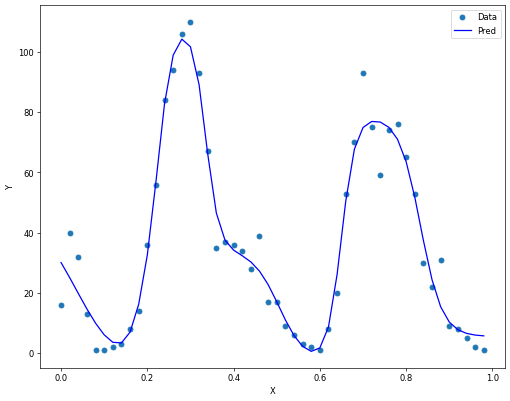

In [20]:
# 绘制效果图
plt.figure(figsize=(10, 8), dpi=60)
figure_1, = plt.plot(x.data.numpy(), y.data.numpy(), 'o')
figure_2, = plt.plot(x.data.numpy(), predictions.data.numpy(), 'b')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([figure_1, figure_2], ['Data', 'Pred'])

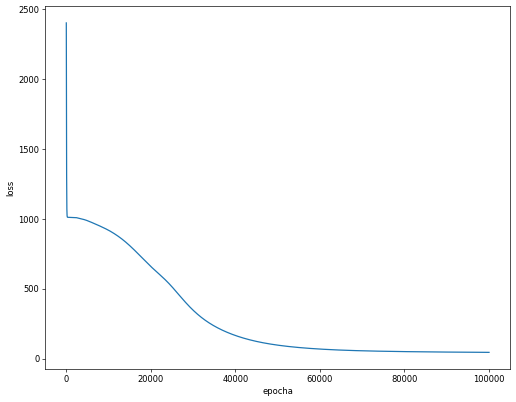

In [21]:
# 绘制损失
plt.figure(figsize=(10, 8), dpi=60)
plt.plot(np.arange(epocha), losses)
plt.xlabel('epocha')
plt.ylabel('loss')
plt.show()

##### 使用复杂一点的网络
###### 神经网络有56个输入层节点、10个隐含层节点和1个输出节点
###### 利用数据库中的星期几、节假日、时间、风速等信息预测共享单车的使用数量

In [22]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt

In [23]:
# 读取信息
data_path = r'D:\project\DLTB\chapter3_bike_predictor\bike_data\hour.csv'
bike_data = pd.read_csv(data_path, index_col=None).fillna(0)
print(bike_data.head(5))

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


In [24]:
# 处理独热编码
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(bike_data[each], prefix=each, drop_first=False)
    bike_data = pd.concat([bike_data, dummies], axis=1)

# 去掉不相关特征
fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = bike_data.drop(fields_to_drop, axis=1)
data.head(5)

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
# 标准化所有特征
quant_features = ['cnt', 'temp', 'hum', 'windspeed']

# 将每一个变量的均值和方差都存储到scaled_features变量中。
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [26]:
# 划分测试集和训练集
train_num = int(0.99 * data.shape[0])
train_data = data[:train_num]
test_data = data[train_num:]

# 划分特征和标签
target_fields = ['cnt', 'casual', 'registered']
train_features, train_targets = train_data.drop(target_fields, axis=1), train_data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

# 转换数据格式
x_train = train_features.values.astype(float)
y_train = train_targets['cnt'].values.astype(float).reshape(-1, 1)

In [42]:
# 将所有的数据集分为测试集和训练集，我们以后21天数据一共21*24个数据点作为测试集，其它是训练集
test_data = data[-21*24:]
train_data = data[:-21*24]
print('训练数据：',len(train_data),'测试数据：',len(test_data))

# 将我们的数据列分为特征列和目标列

#目标列
target_fields = ['cnt', 'casual', 'registered']
features, targets = train_data.drop(target_fields, axis=1), train_data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

# 将数据从pandas dataframe转换为numpy
X = features.values
Y = targets['cnt'].values
Y = Y.astype(float)

Y = np.reshape(Y, [len(Y),1])
losses = []

训练数据： 16875 测试数据： 504


In [51]:
# 定义神经网络架构，features.shape[1]个输入层单元，10个隐含层，1个输出层
input_size = features.shape[1] #输入层单元个数
hidden_size = 10 #隐含层单元个数
output_size = 1 #输出层单元个数
batch_size = 128 #每隔batch的记录数
weights1 = torch.randn([input_size, hidden_size], dtype = torch.double,  requires_grad = True) #第一到二层权重
biases1 = torch.randn([hidden_size], dtype = torch.double, requires_grad = True) #隐含层偏置
weights2 = torch.randn([hidden_size, output_size], dtype = torch.double, requires_grad = True) #隐含层到输出层权重
def neu(x):
    #计算隐含层输出
    #x为batch_size * input_size的矩阵，weights1为input_size*hidden_size矩阵，
    #biases为hidden_size向量，输出为batch_size * hidden_size矩阵    
    hidden = x.mm(weights1) + biases1.expand(x.size()[0], hidden_size)
    hidden = torch.sigmoid(hidden)
    
    #输入batch_size * hidden_size矩阵，mm上weights2, hidden_size*output_size矩阵，
    #输出batch_size*output_size矩阵
    output = hidden.mm(weights2)
    return output
def cost(x, y):
    # 计算损失函数
    error = torch.mean((x - y)**2)
    return error
def zero_grad():
    # 清空每个参数的梯度信息
    if weights1.grad is not None and biases1.grad is not None and weights2.grad is not None:
        weights1.grad.data.zero_()
        weights2.grad.data.zero_()
        biases1.grad.data.zero_()
def optimizer_step(learning_rate):
    # 梯度下降算法
    weights1.data.add_(- learning_rate * weights1.grad.data)
    weights2.data.add_(- learning_rate * weights2.grad.data)
    biases1.data.add_(- learning_rate * biases1.grad.data)

In [53]:
# 神经网络训练循环
losses = []
for i in range(1000):
    # 每128个样本点被划分为一个撮，在循环的时候一批一批地读取
    batch_loss = []
    # start和end分别是提取一个batch数据的起始和终止下标
    for start in range(0, len(X), batch_size):
        end = start + batch_size if start + batch_size < len(X) else len(X)
        xx = torch.tensor(X[start:end], dtype = torch.double, requires_grad = True)
        yy = torch.tensor(Y[start:end], dtype = torch.double, requires_grad = True)
        predict = neu(xx)
        loss = cost(predict, yy)
        zero_grad()
        loss.backward()
        optimizer_step(0.01)
        batch_loss.append(loss.data.numpy())
    
    # 每隔100步输出一下损失值（loss）
    if i % 100==0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

0 0.1540549789864139
100 0.12180204016090079
200 0.10273143875344436
300 0.0923775474303946
400 0.08665663533636181
500 0.08325853777485137
600 0.08107661365144336
700 0.07957868011586072
800 0.0784919572983016
900 0.07766523689241835


Text(0, 0.5, 'MSE')

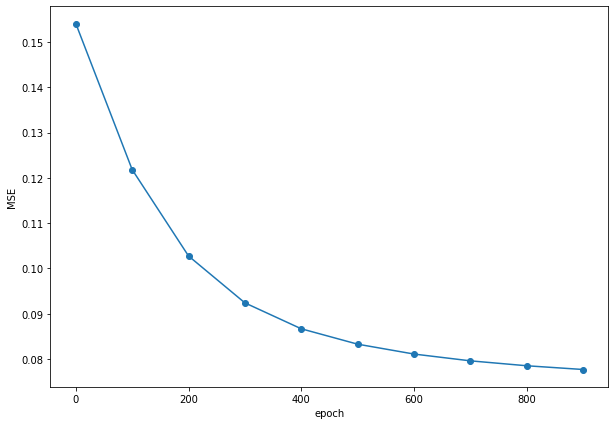

In [54]:
# 打印输出损失值
fig = plt.figure(figsize=(10, 7))
plt.plot(np.arange(len(losses))*100,losses, 'o-')
plt.xlabel('epoch')
plt.ylabel('MSE')

In [55]:
# 定义神经网络架构，features.shape[1]个输入层单元，10个隐含层，1个输出层
input_size = features.shape[1]
hidden_size = 10
output_size = 1
batch_size = 128
neu = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size),
)
cost = torch.nn.MSELoss()
optimizer = torch.optim.SGD(neu.parameters(), lr = 0.01)

In [56]:
# 神经网络训练循环
losses = []
for i in range(1000):
    # 每128个样本点被划分为一个撮，在循环的时候一批一批地读取
    batch_loss = []
    # start和end分别是提取一个batch数据的起始和终止下标
    for start in range(0, len(X), batch_size):
        end = start + batch_size if start + batch_size < len(X) else len(X)
        xx = torch.tensor(X[start:end], dtype = torch.float, requires_grad = True)
        yy = torch.tensor(Y[start:end], dtype = torch.float, requires_grad = True)
        predict = neu(xx)
        loss = cost(predict, yy)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        batch_loss.append(loss.data.numpy())
    
    # 每隔100步输出一下损失值（loss）
    if i % 100==0:
        losses.append(np.mean(batch_loss))
        print(i, np.mean(batch_loss))

0 0.927104
100 0.27353206
200 0.2449835
300 0.19409895
400 0.13740768
500 0.09898495
600 0.08055797
700 0.072117485
800 0.06752951
900 0.064613946


Text(0, 0.5, 'MSE')

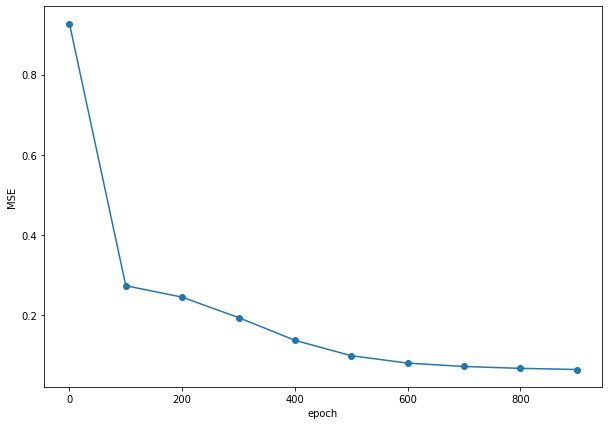

In [57]:
# 打印输出损失值
fig = plt.figure(figsize=(10, 7))
plt.plot(np.arange(len(losses))*100,losses, 'o-')
plt.xlabel('epoch')
plt.ylabel('MSE')

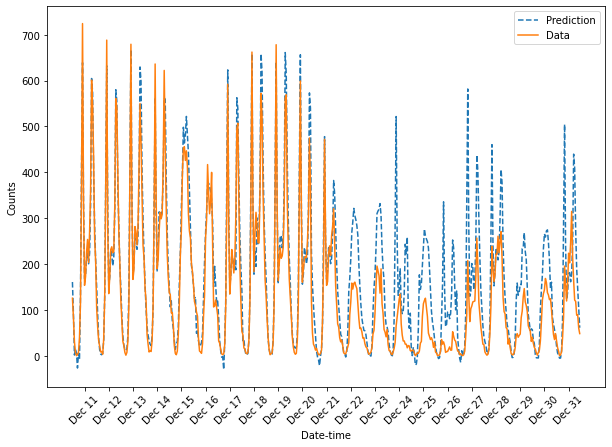

In [59]:
# 用训练好的神经网络在测试集上进行预测
targets = test_targets['cnt'] #读取测试集的cnt数值
targets = targets.values.reshape([len(targets),1]) #将数据转换成合适的tensor形式
targets = targets.astype(float) #保证数据为实数

x = torch.tensor(test_features.values, dtype = torch.float, requires_grad = True)
y = torch.tensor(targets, dtype = torch.float, requires_grad = True)

# 用神经网络进行预测
predict = neu(x)
predict = predict.data.numpy()

# 将后21天的预测数据与真实数据画在一起并比较
# 横坐标轴是不同的日期，纵坐标轴是预测或者真实数据的值
fig, ax = plt.subplots(figsize = (10, 7))

mean, std = scaled_features['cnt']
ax.plot(predict * std + mean, label='Prediction', linestyle = '--')
ax.plot(targets * std + mean, label='Data', linestyle = '-')
ax.legend()
ax.set_xlabel('Date-time')
ax.set_ylabel('Counts')
# 对横坐标轴进行标注
dates = pd.to_datetime(rides.loc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)